## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

In [357]:
# Importing all import python libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import plotly.express as px
%matplotlib inline

In [358]:
# Reading the data file
hotel_df = pd.read_csv("Hotel_book_data_Alma.csv")          

In [359]:
hotel_df.head()         

hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0        342               2015               July   
1  Resort Hotel            0        737               2015               July   
2  Resort Hotel            0          7               2015               July   
3  Resort Hotel            0         13               2015               July   
4  Resort Hotel            0         14               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  ...  deposit_type  \
0                        0                     0       2  ...    No Deposit   
1                        0                     0       2  ...    No Deposit   
2                        0                     1       1  ...    No Deposit   
3                        0                     1       1  ...    No Deposit   
4                        0                     2       2  ...    No Deposit   

   agent company days_in_waiting_list customer_type   adr  \
0    NaN     NaN                    0     Transient   0.0   
1    NaN     NaN                    0     Transient   0.0   
2    NaN     NaN                    0     Transient  75.0   
3  304.0     NaN                    0     Transient  75.0   
4  240.0     NaN                    0     Transient  98.0   

   required_car_parking_spaces  total_of_special_requests  reservation_status  \
0                            0                          0           Check-Out   
1                            0                          0           Check-Out   
2                            0                          0           Check-Out   
3                            0                          0           Check-Out   
4                            0                          1           Check-Out   

  reservation_status_date  
0              2015-07-01  
1              2015-07-01  
2              2015-07-02  
3              2015-07-02  
4              2015-07-03  

[5 rows x 32 columns]

In [360]:
hotel_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [361]:
hotel_df.describe()

is_canceled      lead_time  arrival_date_year  \
count  119390.000000  119390.000000      119390.000000   
mean        0.370416     104.011416        2016.156554   
std         0.482918     106.863097           0.707476   
min         0.000000       0.000000        2015.000000   
25%         0.000000      18.000000        2016.000000   
50%         0.000000      69.000000        2016.000000   
75%         1.000000     160.000000        2017.000000   
max         1.000000     737.000000        2017.000000   

       arrival_date_week_number  arrival_date_day_of_month  \
count             119390.000000              119390.000000   
mean                  27.165173                  15.798241   
std                   13.605138                   8.780829   
min                    1.000000                   1.000000   
25%                   16.000000                   8.000000   
50%                   28.000000                  16.000000   
75%                   38.000000                  23.000000   
max                   53.000000                  31.000000   

       stays_in_weekend_nights  stays_in_week_nights         adults  \
count            119390.000000         119390.000000  119390.000000   
mean                  0.927599              2.500302       1.856403   
std                   0.998613              1.908286       0.579261   
min                   0.000000              0.000000       0.000000   
25%                   0.000000              1.000000       2.000000   
50%                   1.000000              2.000000       2.000000   
75%                   2.000000              3.000000       2.000000   
max                  19.000000             50.000000      55.000000   

            children         babies  is_repeated_guest  \
count  119386.000000  119390.000000      119390.000000   
mean        0.103890       0.007949           0.031912   
std         0.398561       0.097436           0.175767   
min         0.000000       0.000000           0.000000   
25%         0.000000       0.000000           0.000000   
50%         0.000000       0.000000           0.000000   
75%         0.000000       0.000000           0.000000   
max        10.000000      10.000000           1.000000   

       previous_cancellations  previous_bookings_not_canceled  \
count           119390.000000                   119390.000000   
mean                 0.087118                        0.137097   
std                  0.844336                        1.497437   
min                  0.000000                        0.000000   
25%                  0.000000                        0.000000   
50%                  0.000000                        0.000000   
75%                  0.000000                        0.000000   
max                 26.000000                       72.000000   

       booking_changes          agent      company  days_in_waiting_list  \
count    119390.000000  103050.000000  6797.000000         119390.000000   
mean          0.221124      86.693382   189.266735              2.321149   
std           0.652306     110.774548   131.655015             17.594721   
min           0.000000       1.000000     6.000000              0.000000   
25%           0.000000       9.000000    62.000000              0.000000   
50%           0.000000      14.000000   179.000000              0.000000   
75%           0.000000     229.000000   270.000000              0.000000   
max          21.000000     535.000000   543.000000            391.000000   

                 adr  required_car_parking_spaces  total_of_special_requests  
count  119390.000000                119390.000000              119390.000000  
mean      101.831122                     0.062518                   0.571363  
std        50.535790                     0.245291                   0.792798  
min        -6.380000                     0.000000                   0.000000  
25%        69.290000                     0.000000                   0.000000  
50%        94.57500

We see that there are 32 columns in the dataframe and some columns like 'children', 'company', 'country' and 'agent' have null values.

In [362]:
# Creating a copy of dataframe

df1 = hotel_df.copy()

First of all we will try to understand the meaning of all columns of the dataframe. \
For this we will see the unique values attained by each column whose meaning we are unable to understand.

In [363]:
df1['hotel'].unique()

array(['Resort Hotel', 'City Hotel'], dtype=object)

In [364]:
df1['is_canceled'].unique()

array([0, 1], dtype=int64)

In [365]:
df1['arrival_date_year'].unique()

array([2015, 2016, 2017], dtype=int64)

In [366]:
df1['meal'].unique()

array(['BB', 'FB', 'HB', 'SC', 'Undefined'], dtype=object)

In [367]:
df1['market_segment'].unique()

array(['Direct', 'Corporate', 'Online TA', 'Offline TA/TO',
       'Complementary', 'Groups', 'Undefined', 'Aviation'], dtype=object)

In [368]:
df1['distribution_channel'].unique()

array(['Direct', 'Corporate', 'TA/TO', 'Undefined', 'GDS'], dtype=object)

In [369]:
df1['children'].unique()    # This column has 0 as well as null values

array([ 0.,  1.,  2., 10.,  3., nan])

### <b> Cleaning data </b> 

Cleaning data is crucial step before EDA as it will remove the ambigous data that can affect the outcome of EDA.

While cleaning data we will perform following steps: \
1) Remove duplicate rows  \
2) Handling missing values.  \
3) Convert columns to appropriate datatypes.  \
4) Adding important columns

### <b> Step 1: Removing duplicate rows if any </b>

In [370]:
# Show no. of rows of duplicate rows duplicate rows
df1[df1.duplicated()].shape   

(31994, 32)

In [371]:
# Dropping duplicate values
df1.drop_duplicates(inplace = True)

In [372]:
df1.shape

(87396, 32)

### <b> Step2: Handling missing values. </b>

In [373]:
# Columns having missing values.
df1.isnull().sum().sort_values(ascending = False)[:6]

company               82137
agent                 12193
country                 452
children                  4
reserved_room_type        0
assigned_room_type        0
dtype: int64

Since, company and agent columns have comany number and agent numbers as data. There may be some cases when customer didnt booked hotel via any agent or via any company. So in that case values can be null under these columns. \
We will replace null values by 0 in these columns 

In [374]:
df1[['company','agent']] = df1[['company','agent']].fillna(0)

In [375]:
df1['children'].unique()

array([ 0.,  1.,  2., 10.,  3., nan])

This column 'children' has 0 as value which means 0 children were present in group of customers who made that transaction. \
So, 'nan' values are the missing values due to error of recording data. \
 \
We will replace the null values under this column with mean value of children.

In [376]:
df1['children'].fillna(df1['children'].mean(), inplace = True)

Next column with missing value is 'country'.
This column represents the country of oriigin of customer. \
Since, this column has datatype of string. We will replace the missing value with the mode of 'country' column.

In [377]:
df1['country'].fillna('others', inplace = True)

In [378]:
# Checking if all null values are removed
df1.isnull().sum().sort_values(ascending = False)[:6]

hotel                          0
is_canceled                    0
reservation_status             0
total_of_special_requests      0
required_car_parking_spaces    0
adr                            0
dtype: int64

There are some rows with total number of adults, children or babies equal to zero. So we will remove such rows.

In [379]:
df1[df1['adults']+df1['babies']+df1['children'] == 0].shape

(166, 32)

In [380]:
df1.drop(df1[df1['adults']+df1['babies']+df1['children'] == 0].index, inplace = True)

### <b> Step 3: Converting columns to appropriate datatypes. </b>

In [381]:
df1 = df1.dropna(subset=['children', 'company', 'agent'])
df1[['children', 'company', 'agent']] = df1[['children', 'company', 'agent']].astype('int64')


In [382]:
# changing datatype of column 'reservation_status_date' to data_type.
df1['reservation_status_date'] = pd.to_datetime(df1['reservation_status_date'], format = '%Y-%m-%d')

### <b> Step 4: Adding important columns. </b>

In [383]:
# Adding total staying days in hotels
df1['total_stay'] = df1['stays_in_weekend_nights']+df1['stays_in_week_nights']

# Adding total people num as column, i.e. total people num = num of adults + children + babies
df1['total_people'] = df1['adults']+df1['children']+df1['babies']

We are adding this column so that we can analyse the stay length at hotels. 

## EDA ##

Lets first find the correlation between the numerical data.


Since, columns like 'is_cancelled', 'arrival_date_year', 'arrival_date_week_number', 'arrival_date_day_of_month', 'is_repeated_guest', 'company', 'agent' are categorical data having numerical type. So we wont need to check them for correlation.

Also, we have added total_stay and total_people columns. So, we can remove adults, children, babies, stays_in_weekend_nights, stays_in_week_nights columns.

In [384]:
num_df1 = df1[['lead_time','previous_cancellations','previous_bookings_not_canceled','booking_changes','days_in_waiting_list','adr','required_car_parking_spaces','total_of_special_requests','total_stay','total_people']]


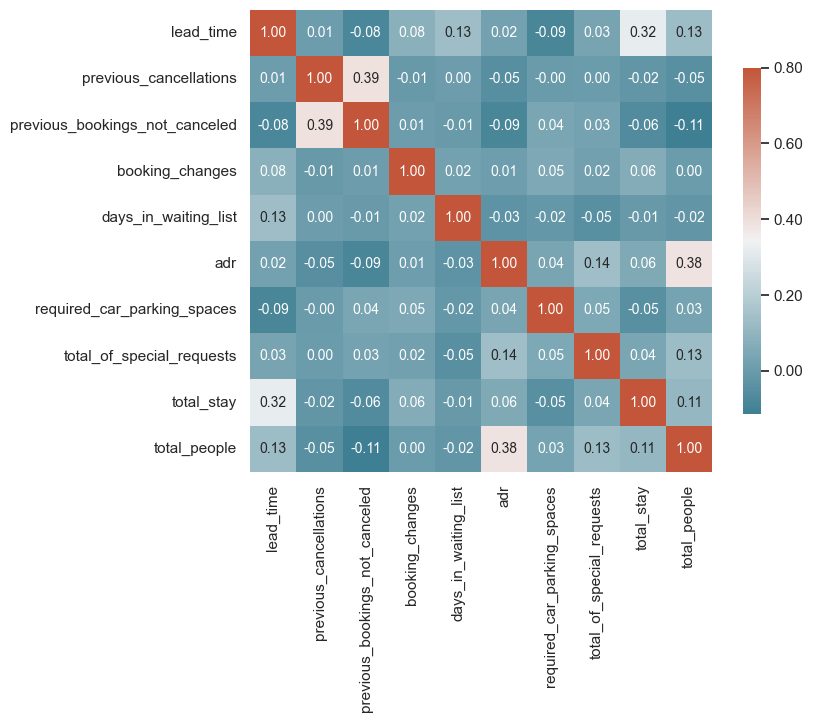

In [385]:
#correlation matrix
corrmat = num_df1.corr()
plt.figure(figsize=(8, 6))
custom_palette = sns.diverging_palette(220, 20, n=256)
sns.heatmap(corrmat, annot=True, fmt='.2f', annot_kws={'size': 10}, 
            vmax=0.8, square=True, cmap=custom_palette,
            cbar_kws={'shrink': 0.75, 'format': '%.2f'})
plt.savefig('custom_correlation_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()


1) Total stay length and lead time have slight correlation. This may means that for longer hotel stays people generally plan little before the the actual arrival.

2) adr is slightly correlated with total_people, which makes sense as more no. of people means more revenue, therefore more adr.

Lets see does length of stay affects the adr.

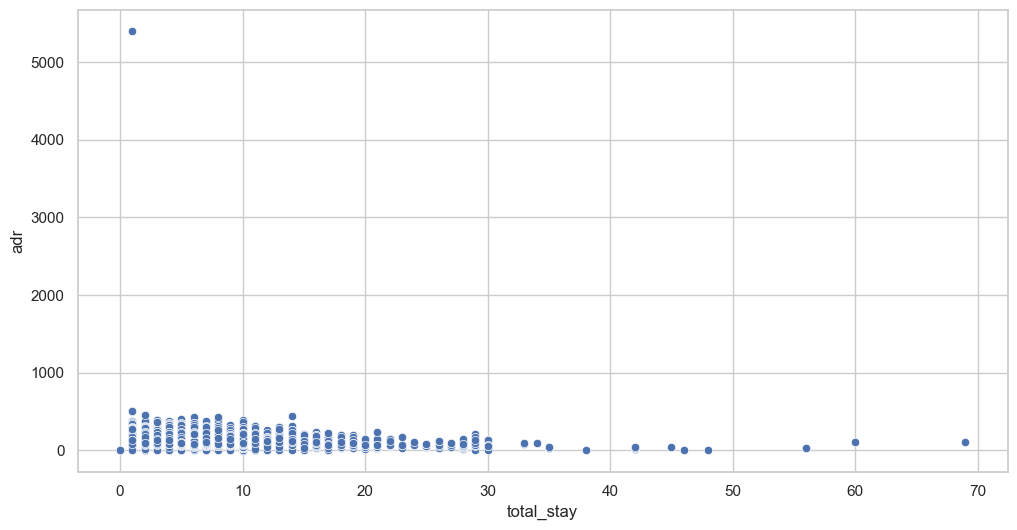

In [386]:
plt.figure(figsize = (12,6))
sns.scatterplot(y = 'adr', x = 'total_stay', data = df1)
plt.show()

We notice that there is an outlier in adr, so we will remove that for better scatter plot

In [387]:
df1.drop(df1[df1['adr'] > 5000].index, inplace = True)

In [388]:

fig = px.scatter(df1, x='total_stay', y='adr', title='Scatter Plot of ADR vs. Total Stay')

# Customize the layout
fig.update_layout(
    xaxis_title='Total Stay',
    yaxis_title='ADR',
    xaxis=dict(tickmode='linear', tick0=0, dtick=1),  # Customize x-axis ticks
    yaxis=dict(tickmode='linear', tick0=0, dtick=50),  # Customize y-axis ticks
    showlegend=False  # Remove legend
)

fig.show()


From the scatter plot we can see that as length of tottal_stay increases the adr decreases. This means for longer stay, the better deal for customer can be finalised.

## Univariate Analysis

Q1) Which agent makes most no. of bookings?

In [389]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 87229 entries, 0 to 119389
Data columns (total 34 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   hotel                           87229 non-null  object        
 1   is_canceled                     87229 non-null  int64         
 2   lead_time                       87229 non-null  int64         
 3   arrival_date_year               87229 non-null  int64         
 4   arrival_date_month              87229 non-null  object        
 5   arrival_date_week_number        87229 non-null  int64         
 6   arrival_date_day_of_month       87229 non-null  int64         
 7   stays_in_weekend_nights         87229 non-null  int64         
 8   stays_in_week_nights            87229 non-null  int64         
 9   adults                          87229 non-null  int64         
 10  children                        87229 non-null  int64         
 11  babies

In [390]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you already have the 'd1' DataFrame with agent counts

# Set the figure size
plt.figure(figsize=(10, 5))

# Create the bar plot, replace 'agent_column' with the actual column name
sns.barplot(x='num_of_bookings', y='agent', data=d1, order=d1.sort_values('num_of_bookings', ascending=False).agent, palette='viridis')

# Add labels and title
plt.xlabel('Number of Bookings')
plt.ylabel('Agent')
plt.title('Top 10 Performing Agents by Number of Bookings')

# Show the plot
plt.show()


KeyError: 'num_of_bookings'

<Figure size 1000x500 with 0 Axes>

Agent no. 9 has made most no. of bookings.

Q2) Which room type is in most demand and which room type generates highest adr?

Most demanded room type is A, but better adr rooms are of type H, G and C also. Hotels should increase the no. of room types A and H to maximise revenue.

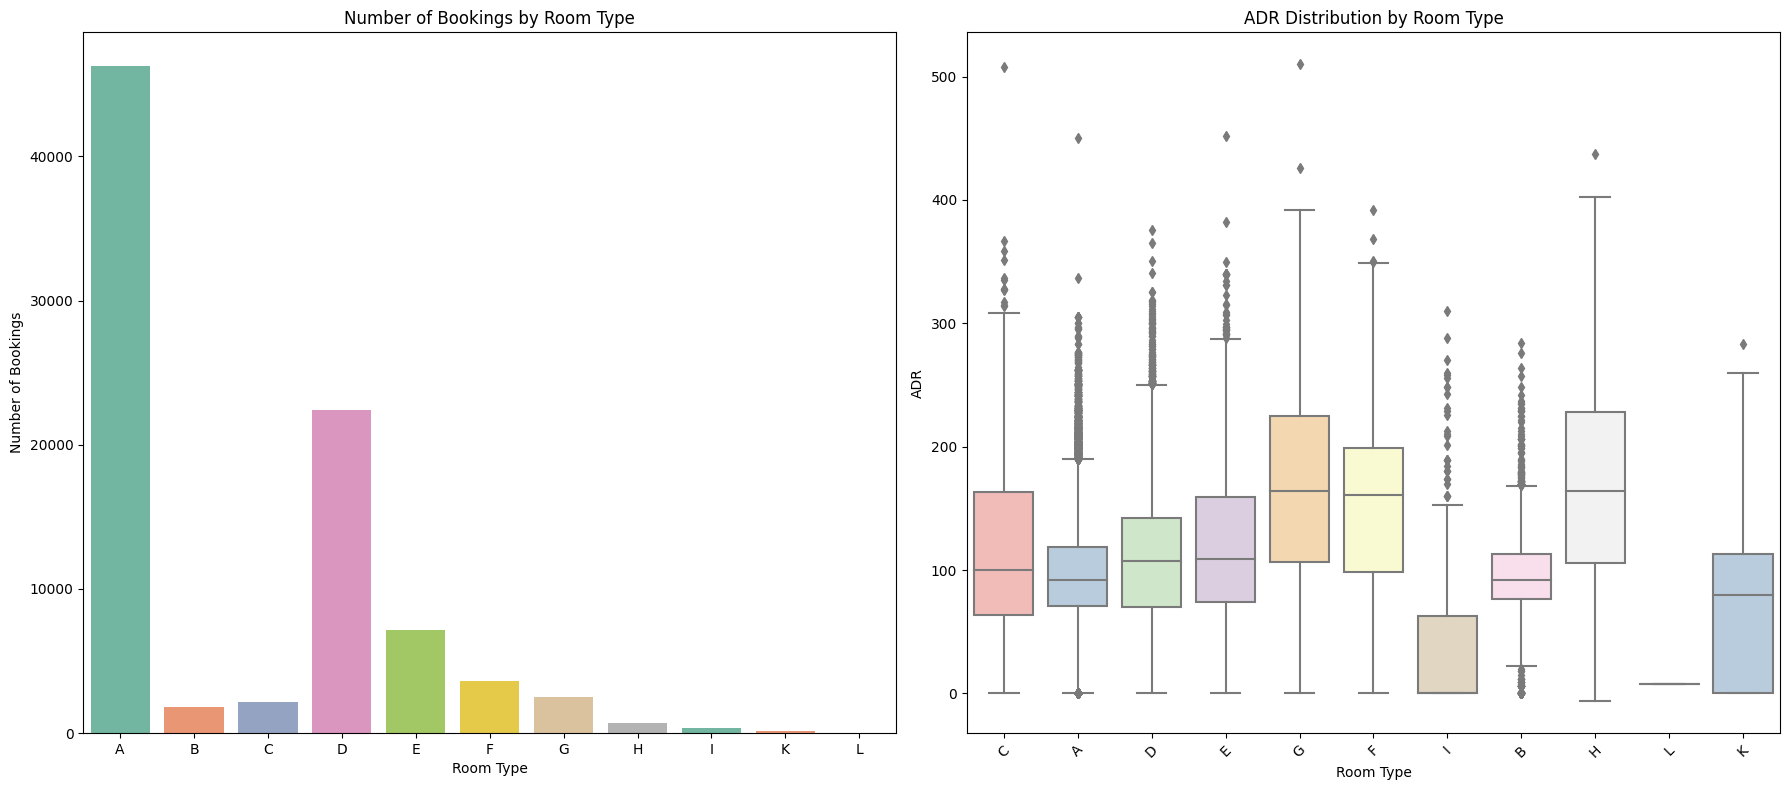

In [ ]:

fig, axes = plt.subplots(1, 2, figsize=(18, 8))

# Group data by 'assigned_room_type' and count the number of bookings
grp_by_room = df1.groupby('assigned_room_type')['adr'].count().reset_index()

# Customize the first subplot (countplot)
sns.barplot(ax=axes[0], x='assigned_room_type', y='adr', data=grp_by_room, palette='Set2')
axes[0].set_title('Number of Bookings by Room Type')
axes[0].set_xlabel('Room Type')
axes[0].set_ylabel('Number of Bookings')

# Customize the second subplot (boxplot)
sns.boxplot(ax=axes[1], x='assigned_room_type', y='adr', data=df1, palette='Pastel1')
axes[1].set_title('ADR Distribution by Room Type')
axes[1].set_xlabel('Room Type')
axes[1].set_ylabel('ADR')

# Rotate x-axis labels for better readability in the second subplot
axes[1].tick_params(axis='x', rotation=45)
plt.savefig('output_chart.png', dpi=300, bbox_inches='tight')
# Adjust subplot spacing
plt.tight_layout()

# Show the plot
plt.show()


Q3) Which meal type is most preffered meal of customers?

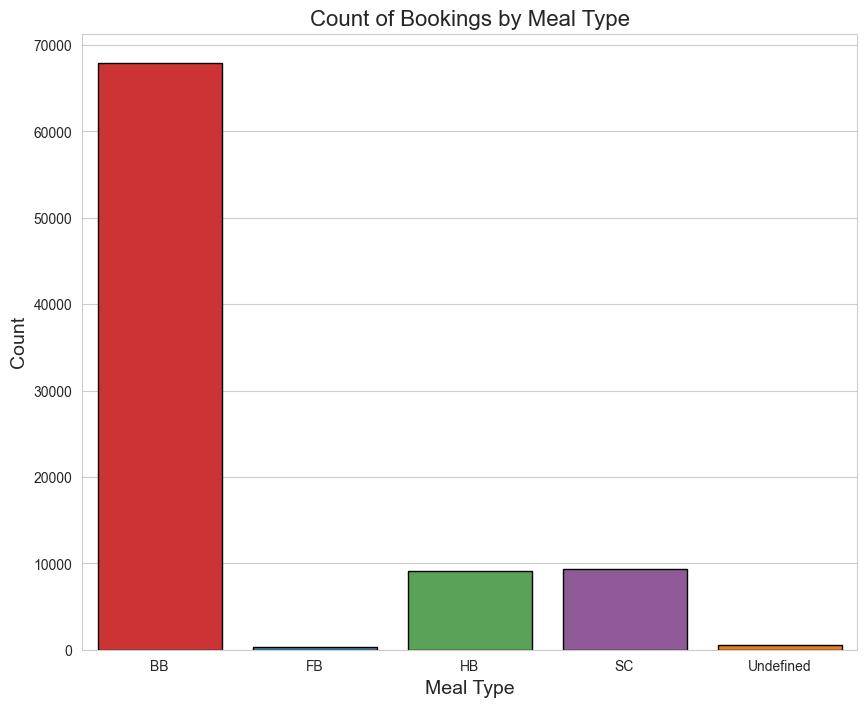

<Figure size 640x480 with 0 Axes>

In [ ]:

# Set a custom color palette
custom_palette = sns.color_palette("Set1")

# Create a figure with a specific size
plt.figure(figsize=(10, 8))

# Create a countplot with customized color palette and style
sns.countplot(x=df1['meal'], palette=custom_palette, edgecolor='black')

# Add labels and a title
plt.xlabel('Meal Type', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Count of Bookings by Meal Type', fontsize=16)
plt.show()
plt.savefig('count_of _booking.png', dpi=300, bbox_inches='tight')

Most preferred meal type is BB (Bed and breakfast).

## <b> (1) Hotel wise analysis </b>

Q1) What is percentage of bookings in each hotel?

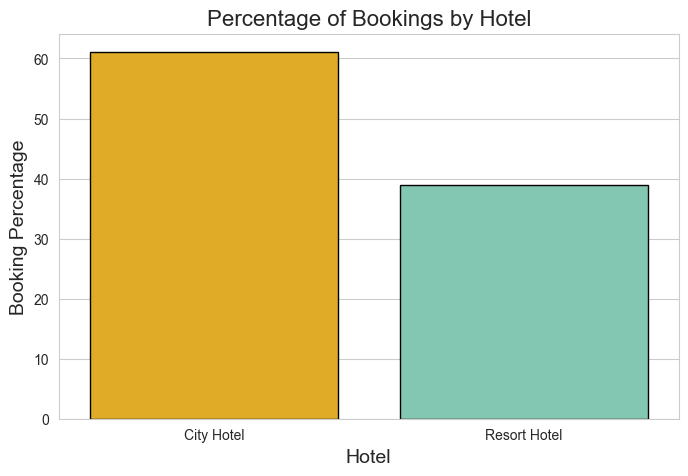

<Figure size 640x480 with 0 Axes>

In [ ]:

grouped_by_hotel = df1.groupby('hotel')
booking_percentage = (grouped_by_hotel.size() / df1.shape[0]) * 100
d1 = pd.DataFrame({'Hotel': booking_percentage.index, 'Booking Percentage': booking_percentage.values})

custom_palette = ['#ffba08', '#78D1B6']
plt.figure(figsize=(8, 5))

# Create a bar plot with customized color palette and style
sns.barplot(x='Hotel', y='Booking Percentage', data=d1, palette=custom_palette, edgecolor='black')
plt.xlabel('Hotel', fontsize=14)
plt.ylabel('Booking Percentage', fontsize=14)
plt.title('Percentage of Bookings by Hotel', fontsize=16)
plt.show()
plt.savefig('percentage_of_booking.png', dpi=300, bbox_inches='tight')

Around 60% bookings are for City hotel and 40% bookings are for Resort hotel.

Q2) which hotel seems to make more revenue?

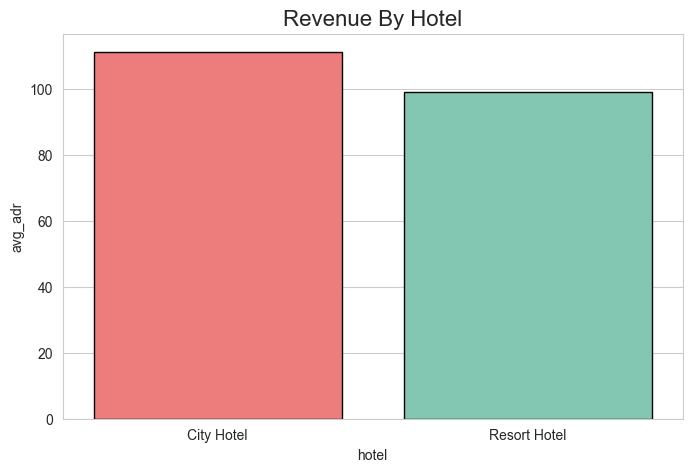

<Figure size 640x480 with 0 Axes>

In [ ]:
d3 = grouped_by_hotel['adr'].agg(np.mean).reset_index().rename(columns = {'adr':'avg_adr'})   # calculating average adr
plt.figure(figsize = (8,5))
sns.barplot(x = d3['hotel'], y = d3['avg_adr'] ,palette=custom_palette, edgecolor='black')
plt.title('Revenue By Hotel',fontsize=16)
plt.show()
plt.savefig('More_revenue_hotel.png', dpi=300, bbox_inches='tight')

Avg adr of Resort hotel is slightly lower than that of City hotel. Hence, City hotel seems to be making slightly more revenue.

Q3) Which hotel has higher lead time?

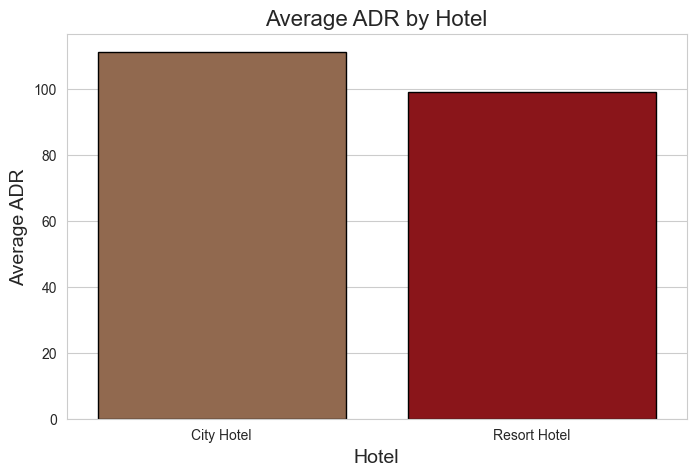

In [ ]:

# Calculate the average ADR for each hotel
d3 = grouped_by_hotel['adr'].agg(np.mean).reset_index().rename(columns={'adr': 'Average ADR'})

# Set a custom color palette
custom_palette = ['#9c6644', '#9d0208']

# Create a figure with a specific size
plt.figure(figsize=(8, 5))

# Create a bar plot with customized color palette and style
sns.barplot(x='hotel', y='Average ADR', data=d3, palette=custom_palette, edgecolor='black')

# Add labels and a title
plt.xlabel('Hotel', fontsize=14)
plt.ylabel('Average ADR', fontsize=14)
plt.title('Average ADR by Hotel', fontsize=16)
plt.show()


City hotel has slightly higher median lead time. Also median lead time is significantly higher in each case, this means customers generally plan their hotel visits way to early.

Q4) What is preferred stay length in each hotel?

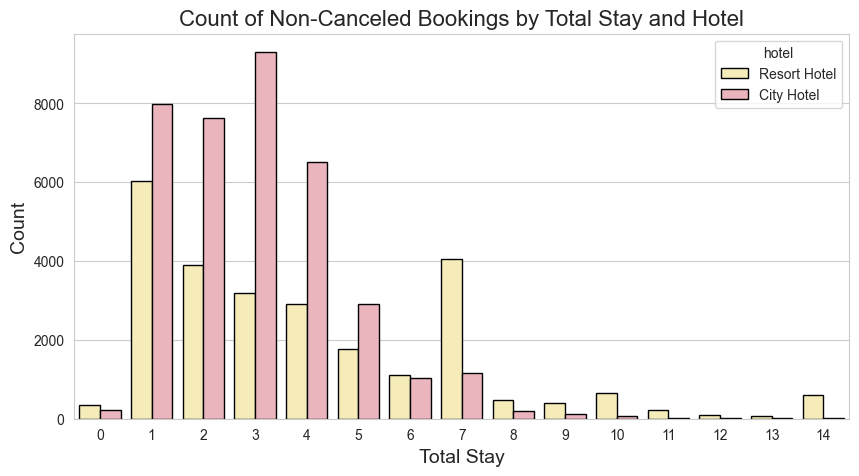

In [ ]:
# Filter the DataFrame for non-canceled bookings and stays less than 15
not_canceled = df1[df1['is_canceled'] == 0]
s1 = not_canceled[not_canceled['total_stay'] < 15]

# Set a custom color palette
custom_palette = ['#fff3b0', '#f4acb7']

# Create a figure with a specific size
plt.figure(figsize=(10, 5))

# Create a countplot with customized color palette and style
sns.countplot(x=s1['total_stay'], hue=s1['hotel'], palette=custom_palette, edgecolor='black')

# Add labels and a title
plt.xlabel('Total Stay', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Count of Non-Canceled Bookings by Total Stay and Hotel', fontsize=16)

# Show the plot
plt.show()


Most common stay length is less than 4 days and generally people prefer City hotel for short stay, but for long stays, Resort Hotel is preferred.

Q5) Which hotel has longer waiting time?

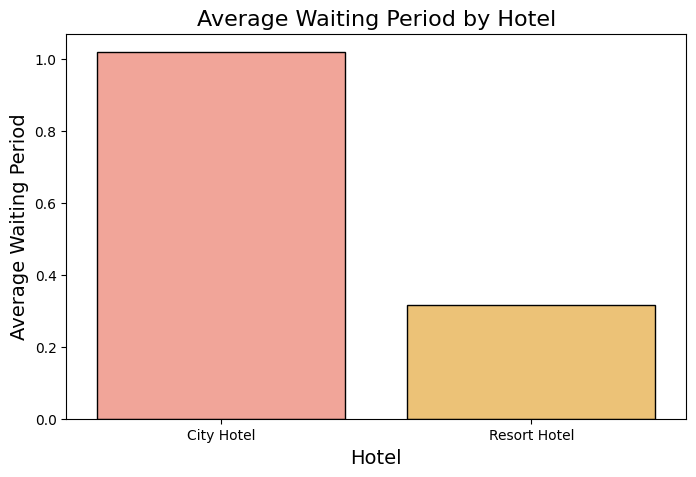

In [ ]:
# Calculate the average waiting period for each hotel
d5 = pd.DataFrame(grouped_by_hotel['days_in_waiting_list'].agg(np.mean).reset_index().rename(columns={'days_in_waiting_list': 'Average Waiting Period'}))

# Define a different custom color palette
custom_palette = ['#FF9A8B', '#FFC864']

# Create a figure with a specific size
plt.figure(figsize=(8, 5))

# Create a bar plot with the new custom color palette and style
sns.barplot(x='hotel', y='Average Waiting Period', data=d5, palette=custom_palette, edgecolor='black')

# Add labels and a title
plt.xlabel('Hotel', fontsize=14)
plt.ylabel('Average Waiting Period', fontsize=14)
plt.title('Average Waiting Period by Hotel', fontsize=16)

# Customize tick labels if needed
# plt.xticks(rotation=45)

# Show the plot
plt.show()


City hotel has significantly longer waiting time, hence City Hotel is much busier than Resort Hotel.

Q6) Which hotel has higher bookings cancellation rate.

In [ ]:
# Selecting and counting number of cancelled bookings for each hotel.
cancelled_data = df1[df1['is_canceled'] == 1]
cancel_grp = cancelled_data.groupby('hotel')
D1 = pd.DataFrame(cancel_grp.size()).rename(columns = {0:'total_cancelled_bookings'})

# Counting total number of bookings for each type of hotel
grouped_by_hotel = df1.groupby('hotel')
total_booking = grouped_by_hotel.size()
D2 = pd.DataFrame(total_booking).rename(columns = {0: 'total_bookings'})
D3 = pd.concat([D1,D2], axis = 1)

# Calculating cancel percentage 
D3['cancel_%'] = round((D3['total_cancelled_bookings']/D3['total_bookings'])*100,2)
D3

total_cancelled_bookings  total_bookings  cancel_%
hotel                                                           
City Hotel                       16034           53273     30.10
Resort Hotel                      7974           33956     23.48

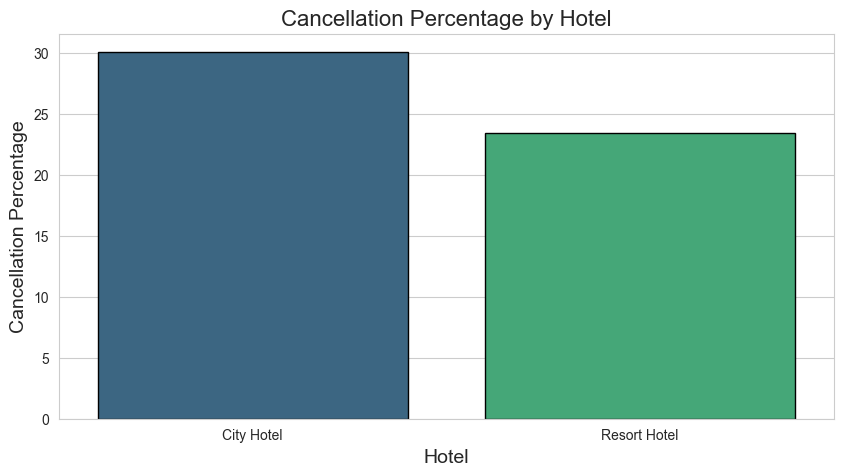

In [ ]:
# Set the figure size and style
plt.figure(figsize=(10, 5))
sns.set_style("whitegrid")

# Create a bar plot with customized colors and style
sns.barplot(x=D3.index, y=D3['cancel_%'], palette='viridis',edgecolor='black')

# Add labels and a title
plt.xlabel('Hotel', fontsize=14)
plt.ylabel('Cancellation Percentage', fontsize=14)
plt.title('Cancellation Percentage by Hotel', fontsize=16)

# Rotate x-axis labels for better readability
plt.xticks
plt.show()


Almost 30 % of City Hotel bookings got canceled. 

Q7) Which hotel has high chance that its customer will return for another stay?

In [ ]:
# Calculating repeat %
D3['repeat_%'] = round((D3['total_repeated_guests'] / D3['total_bookings']) * 100, 2)

# Set the figure size
plt.figure(figsize=(10, 5))

# Create a bar plot with customized colors and style
sns.barplot(x=D3.index, y=D3['repeat_%'], palette='viridis')

# Add labels and a title
plt.xlabel('Hotel', fontsize=14, rotation=90)
plt.ylabel('Repeat Percentage', fontsize=14)
plt.title('Repeat Guest Percentage by Hotel', fontsize=16)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Remove grid lines
sns.despine()

# Show the plot
plt.show()


KeyError: 'total_repeated_guests'

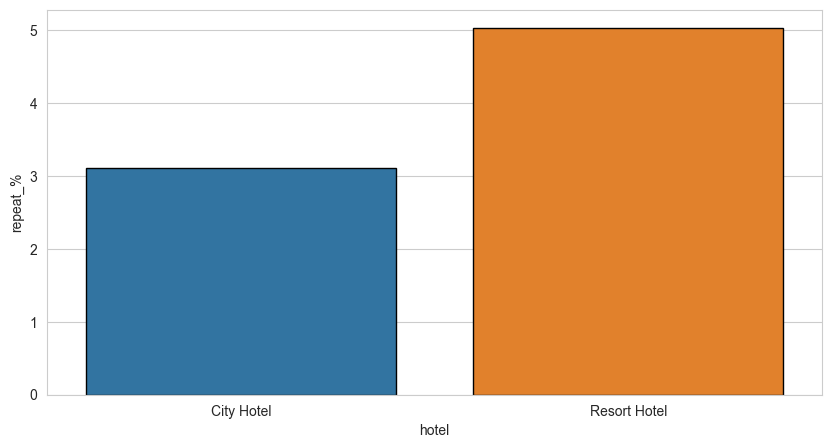

In [ ]:
# Selecting and counting repeated customers bookings
repeated_data = df1[df1['is_repeated_guest'] == 1]
repeat_grp = repeated_data.groupby('hotel')
D1 = pd.DataFrame(repeat_grp.size()).rename(columns = {0:'total_repeated_guests'})

# Counting total bookings
total_booking = grouped_by_hotel.size()
D2 = pd.DataFrame(total_booking).rename(columns = {0: 'total_bookings'})
D3 = pd.concat([D1,D2], axis = 1)

# Calculating repeat %
D3['repeat_%'] = round((D3['total_repeated_guests']/D3['total_bookings'])*100,2)

plt.figure(figsize = (10,5))
sns.barplot(x = D3.index, y = D3['repeat_%'],edgecolor='black')
plt.show()

Both hotels have very small percentage that customer will repeat, but Resort hotel has slightly higher repeat % than City Hotel.

## <b> (2) Distribution Channel wise Analysis </b>

Q1) Which is the most common channel for booking hotels?

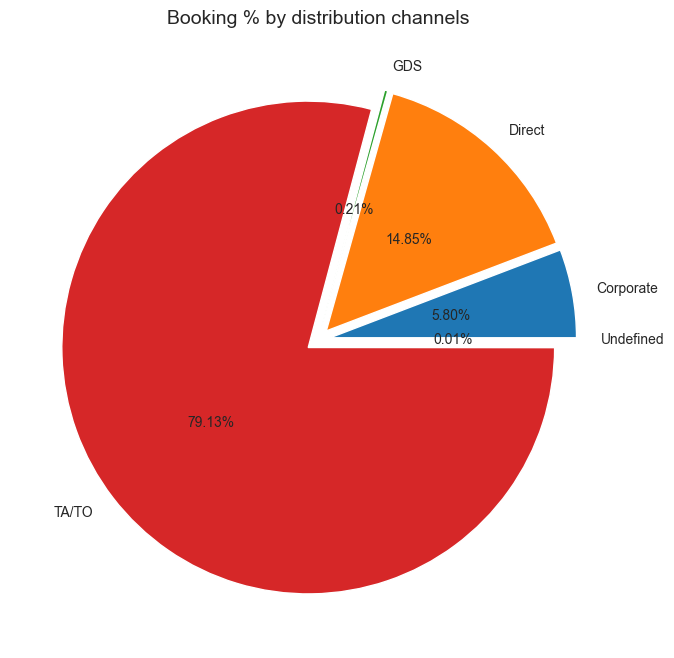

In [ ]:
group_by_dc = df1.groupby('distribution_channel')
d1 = pd.DataFrame(round((group_by_dc.size()/df1.shape[0])*100,2)).reset_index().rename(columns = {0: 'Booking_%'})
plt.figure(figsize = (8,8))
data = d1['Booking_%']
labels = d1['distribution_channel']
plt.pie(x=data, autopct="%.2f%%", explode=[0.05]*5, labels=labels, pctdistance=0.5,)
plt.title("Booking % by distribution channels", fontsize=14);

Q2) Which channel is mostly used for early booking of hotels?

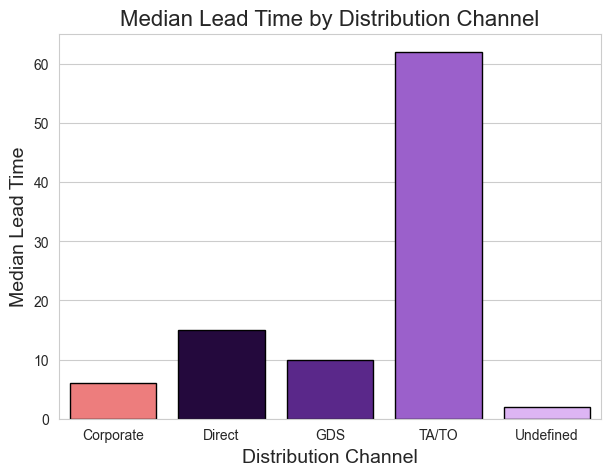

In [ ]:
group_by_dc = df1.groupby('distribution_channel')
d2 = pd.DataFrame(round(group_by_dc['lead_time'].median(), 2)).reset_index().rename(columns={'distribution_channel': 'Distribution Channel', 'lead_time': 'Median Lead Time'})

# Set a custom color palette
custom_palette = ['#FF6B6B', '#240046', '#5a189a','#9d4edd', '#e0aaff']

# Create a figure with a specific size
plt.figure(figsize=(7, 5))

# Create the bar plot with customized colors and style
sns.barplot(x='Distribution Channel', y='Median Lead Time', data=d2, palette=custom_palette, edgecolor='black')

# Add labels and a title
plt.xlabel('Distribution Channel', fontsize=14)
plt.ylabel('Median Lead Time', fontsize=14)
plt.title('Median Lead Time by Distribution Channel', fontsize=16)
plt.show()


TA/TO is mostly used for planning Hotel visits ahead of time. But for sudden visits other mediums are most preferred.

Q3) Which channel has longer average waiting time?

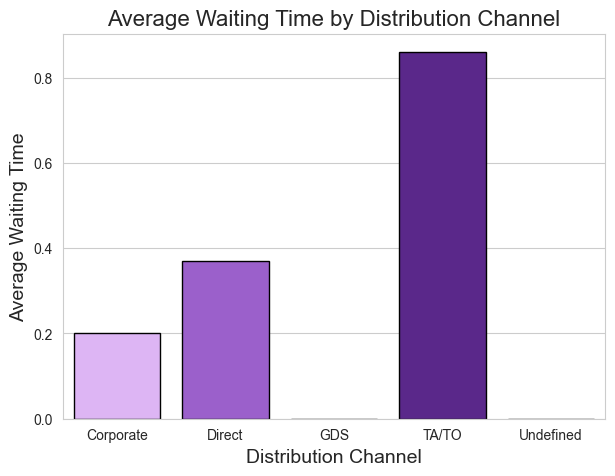

In [ ]:
# Group the data by 'distribution_channel' and calculate the average waiting time
group_by_dc = df1.groupby('distribution_channel')
d4 = pd.DataFrame(round(group_by_dc['days_in_waiting_list'].mean(), 2)).reset_index().rename(columns={'distribution_channel': 'Distribution Channel', 'days_in_waiting_list': 'Average Waiting Time'})

# Set a custom color palette
custom_palette = ['#e0aaff', '#9d4edd', '#FFC864', '#5a189a', '#FFA07A']

# Create a figure with a specific size
plt.figure(figsize=(7, 5))

# Create the bar plot with customized colors and style
sns.barplot(x='Distribution Channel', y='Average Waiting Time', data=d4, palette=custom_palette, edgecolor='black')

# Add labels and a title
plt.xlabel('Distribution Channel', fontsize=14)
plt.ylabel('Average Waiting Time', fontsize=14)
plt.title('Average Waiting Time by Distribution Channel', fontsize=16)
plt.show()


While booking via TA/TO one may have to wait a little longer to confirm booking of rooms.

Q4) Which distribution channel brings better revenue generating deals for hotels?

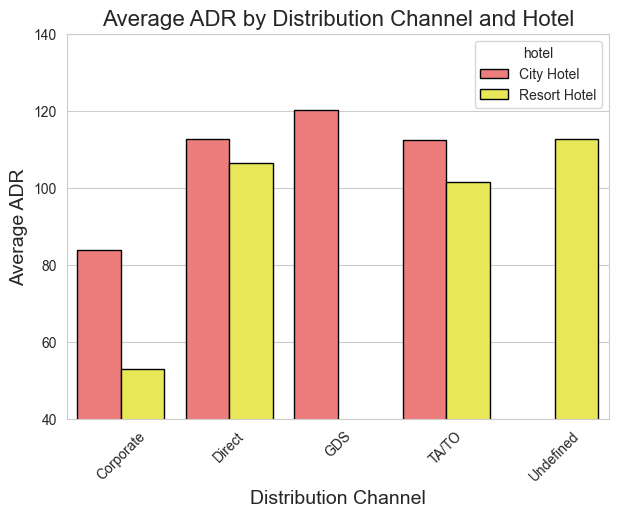

In [ ]:
# Group the data by 'distribution_channel' and 'hotel' and calculate the average ADR
group_by_dc_hotel = df1.groupby(['distribution_channel', 'hotel'])
d5 = pd.DataFrame(round(group_by_dc_hotel['adr'].mean(), 2)).reset_index().rename(columns={'adr': 'Average ADR'})

# Set a custom color palette
custom_palette = ['#FF6B6B', '#ffff3f']

# Create a figure with a specific size
plt.figure(figsize=(7, 5))

# Create the bar plot with customized colors and style, using hue for 'hotel'
sns.barplot(x='distribution_channel', y='Average ADR', data=d5, hue='hotel', palette=custom_palette, edgecolor='black')

# Add labels and a title
plt.xlabel('Distribution Channel', fontsize=14)
plt.ylabel('Average ADR', fontsize=14)
plt.title('Average ADR by Distribution Channel and Hotel', fontsize=16)

# Set the y-axis limit
plt.ylim(40, 140)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()


GDS channel brings higher revenue generating deals for City hotel, in contrast to that most bookings come via TA/TO. City Hotel can work to increase outreach on GDS channels to get more higher revenue generating deals.

Resort hotel has more revnue generating deals by direct and TA/TO channel. Resort Hotel need to increase outreach on GDS channel to increase revenue.

## <b> (3) Booking cancellation Analysis </b>

Let us try to understand what causes the people to cancel the booking.

Q1) Which significant distribution channel has highest cancellation percentage?

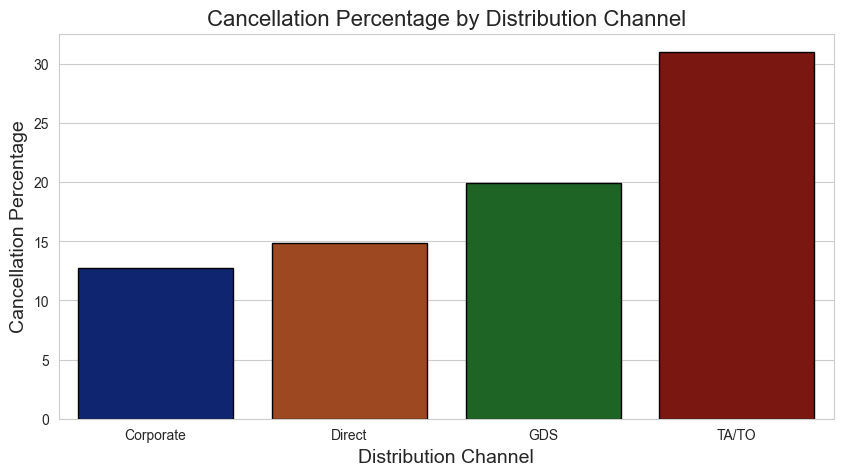

In [ ]:
# Assuming you have already calculated the DataFrame 'd1'

# Create a figure with a specific size
plt.figure(figsize=(10, 5))

# Create a bar plot with the 'dark' color palette
sns.barplot(x=d1.index, y=d1['Cancel_%'], palette='dark', edgecolor='black')

# Add labels and a title
plt.xlabel('Distribution Channel', fontsize=14)
plt.ylabel('Cancellation Percentage', fontsize=14)
plt.title('Cancellation Percentage by Distribution Channel', fontsize=16)
plt.show()


TA/TO has highest booking cancellation %. Therefore, a booking via TA/TO is 30% likely to get cancelled.

Let us see what causes the cancelation of bookings of rooms by customers \
 \
 One question can arise that may be longer waiting period or longer lead time causes the cancellation of bookings, let us check that.

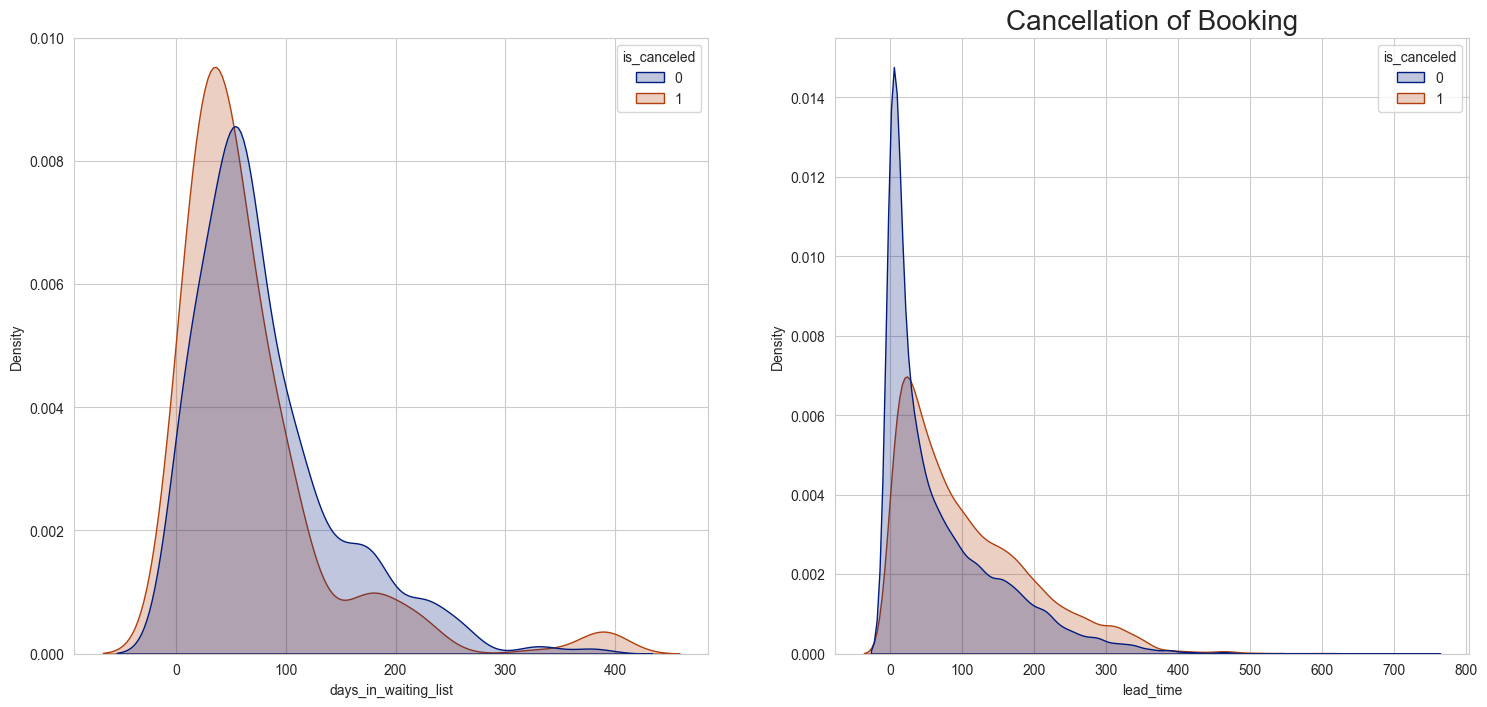

In [ ]:
# Selecting bookings with non-zero waiting time
waiting_bookings = df1[df1['days_in_waiting_list'] != 0]

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

# Plot KDE plot for 'days_in_waiting_list' with hue 'is_canceled'
sns.kdeplot(
    ax=axes[0],
    x='days_in_waiting_list',
    hue='is_canceled',
    data=waiting_bookings,
    fill=True,
    common_norm=False,
    palette='dark'
)

# Plot KDE plot for 'lead_time' with hue 'is_canceled'
sns.kdeplot(
    ax=axes[1],
    x=df1['lead_time'],
    hue=df1['is_canceled'],
    fill=True,
    common_norm=False,
    palette='dark'
)
plt.title('Cancellation of Booking',fontsize=20)
plt.show()


We see that most of the bookings that are cancelled have waiting period of less 150 days but also most of bookings that are not cancelled also have waiting period less than 150 days. Hence this shows that waiting period has no effect on cancellation of bookings. \
\
Also, lead time has no affect on cancellation of bookings, as both curves of cancelation and not cncelation are similar for lead time too.

Now we will check whether not getting allotted the same room type as demanded is the cause of cancellation fo bookings

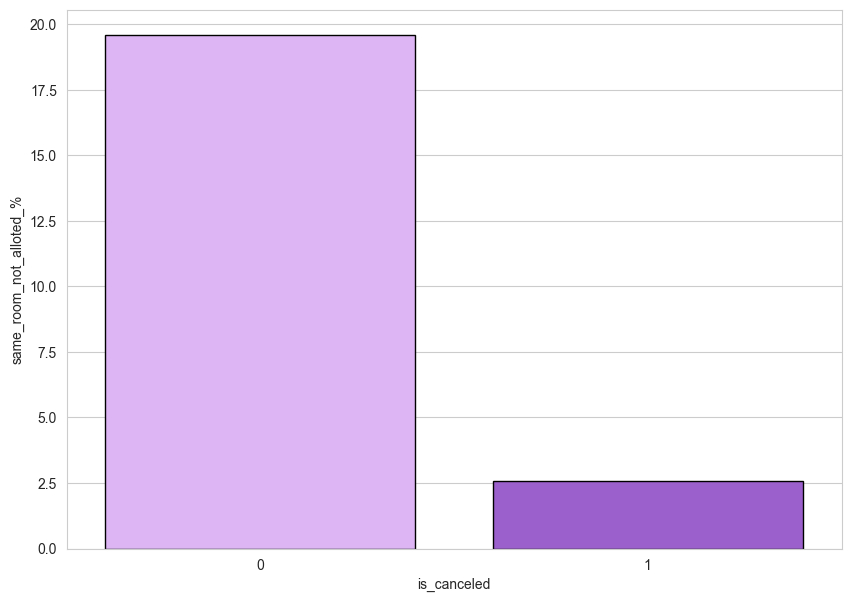

In [ ]:
def check_room_allot(x):
  if x['reserved_room_type'] != x['assigned_room_type']:
    return 1
  else:
    return 0

df1['same_room_not_alloted'] = df1.apply(lambda x : check_room_allot(x), axis = 1)
grp_by_canc = df1.groupby('is_canceled')
custom_palette = ['#e0aaff', '#9d4edd']
D3 = pd.DataFrame((grp_by_canc['same_room_not_alloted'].sum()/grp_by_canc.size())*100).rename(columns = {0: 'same_room_not_alloted_%'})
plt.figure(figsize = (10,7),)
sns.barplot(x = D3.index, y = D3['same_room_not_alloted_%'],palette=custom_palette, edgecolor='Black')
plt.show()

We see that not getting same room as demanded is not the case of cancellation of rooms. A significant percentage of bookings are not cancelled even after getting different room as demanded.

Lets see does not getting same room affects the adr.

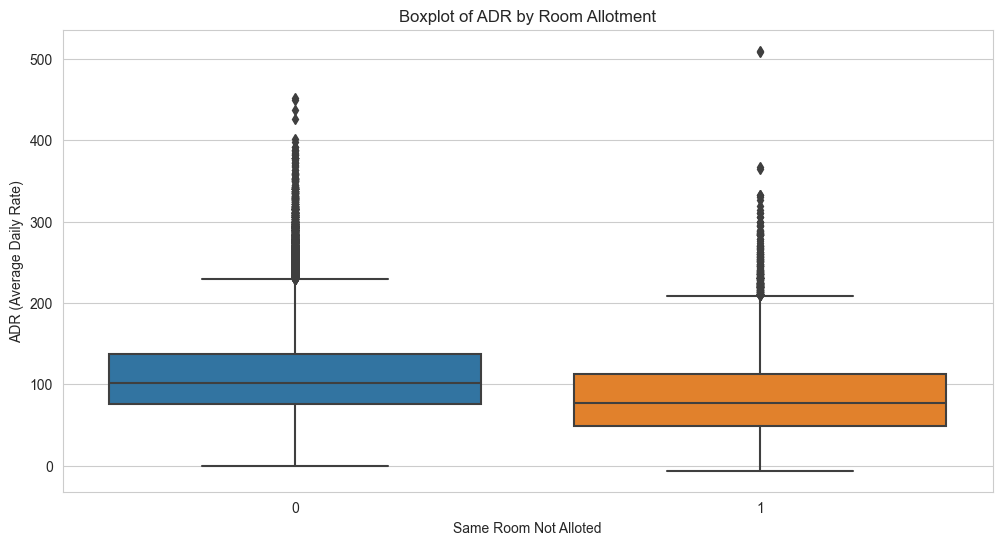

In [ ]:

plt.figure(figsize=(12, 6))
# Create the boxplot
sns.boxplot(x='same_room_not_alloted', y='adr', data=df1)

# Add labels and a title
plt.xlabel('Same Room Not Alloted')
plt.ylabel('ADR (Average Daily Rate)')
plt.title('Boxplot of ADR by Room Allotment')

# Show the plot
plt.show()


So not getting same room do affects the adr, people who didn't got same room have paid a little lower adr, except for few exceptions.

## <b> (4) Time wise analysis </b>

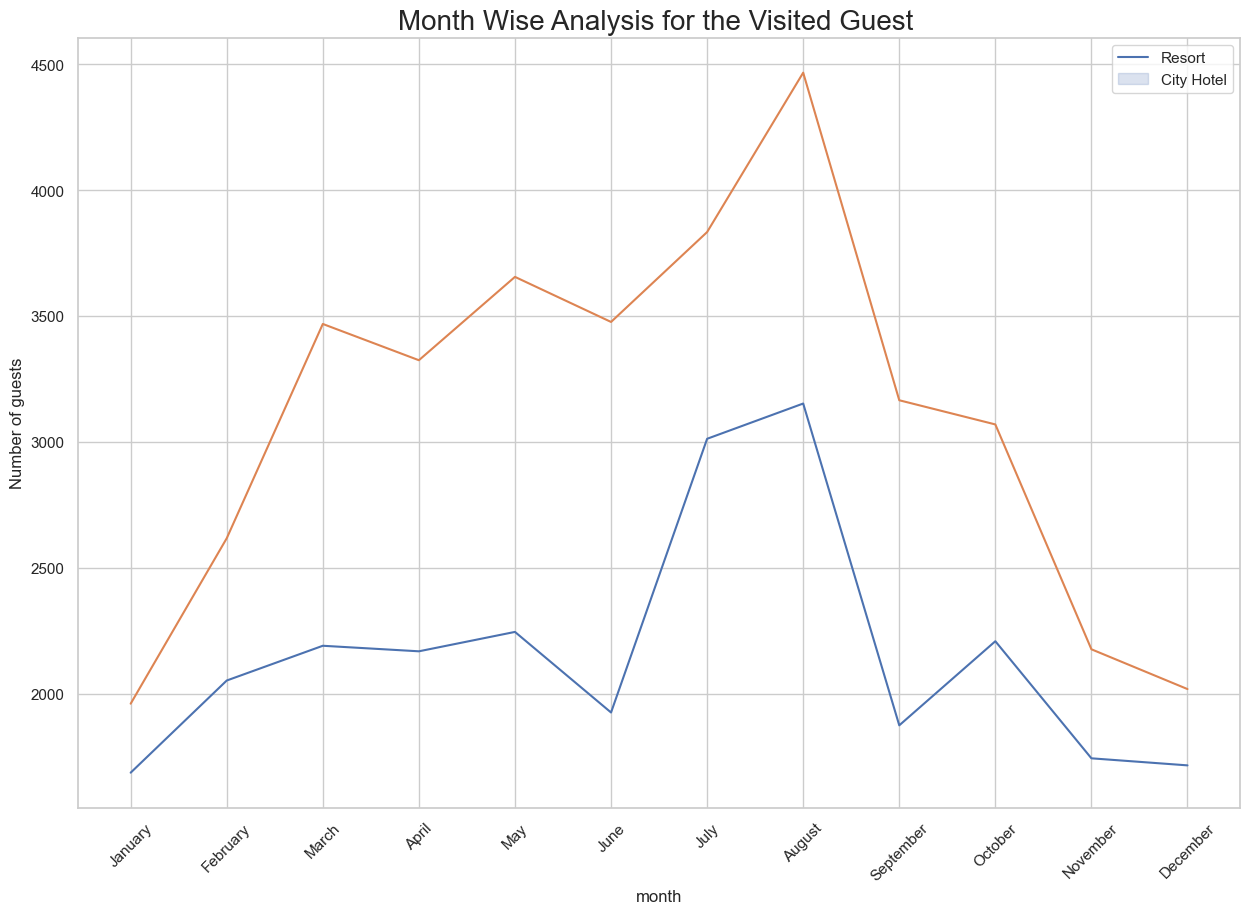

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Extract and prepare data for busy months
months_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

d_month = df1[df1['is_canceled'] == 0]['arrival_date_month'].value_counts().reindex(months_order).reset_index()
d_month.columns = ['months', 'Number of guests']

# Extract and prepare data for average prices
data_resort = df1[(df1['hotel'] == 'Resort Hotel') & (df1['is_canceled'] == 0)]
data_city = df1[(df1['hotel'] == 'City Hotel') & (df1['is_canceled'] == 0)]

final_hotel = data_resort.groupby('arrival_date_month')['adr'].mean().reindex(months_order).reset_index()
final_hotel.columns = ['month', 'price_for_resort']
final_hotel['price_for_city_hotel'] = data_city.groupby('arrival_date_month')['adr'].mean().reindex(months_order).values

# Extract and prepare data for guest counts
resort_guest = data_resort['arrival_date_month'].value_counts().reindex(months_order).reset_index()
resort_guest.columns = ['month', 'no of guests in resort']

city_guest = data_city['arrival_date_month'].value_counts().reindex(months_order).reset_index()
city_guest.columns = ['month', 'no of guest in city hotel']

final_guest = resort_guest.merge(city_guest, on='month')
final_guest.columns = ['month', 'no of guests in resort', 'no of guest in city hotel']

# Plotting
sns.set(style="whitegrid")
plt.figure(figsize=(15, 10))
sns.lineplot(data=final_guest, x='month', y='no of guests in resort')
sns.lineplot(data=final_guest, x='month', y='no of guest in city hotel')
plt.legend(['Resort', 'City Hotel'])
plt.ylabel('Number of guests')
plt.xticks(rotation=45)
plt.title('Month Wise Analysis for the Visited Guest ',fontsize=20)
plt.show()


Most number of guest comes in month of August.

Now lets see which month results in high revenue.

In [ ]:
data_resort = df1[(df1['hotel'] == 'Resort Hotel') & (df1['is_canceled'] == 0)]
data_city = df1[(df1['hotel'] == 'City Hotel') & (df1['is_canceled'] == 0)]

Text(0.5, 1.0, 'Monthwise Analysis for the High Revenue')

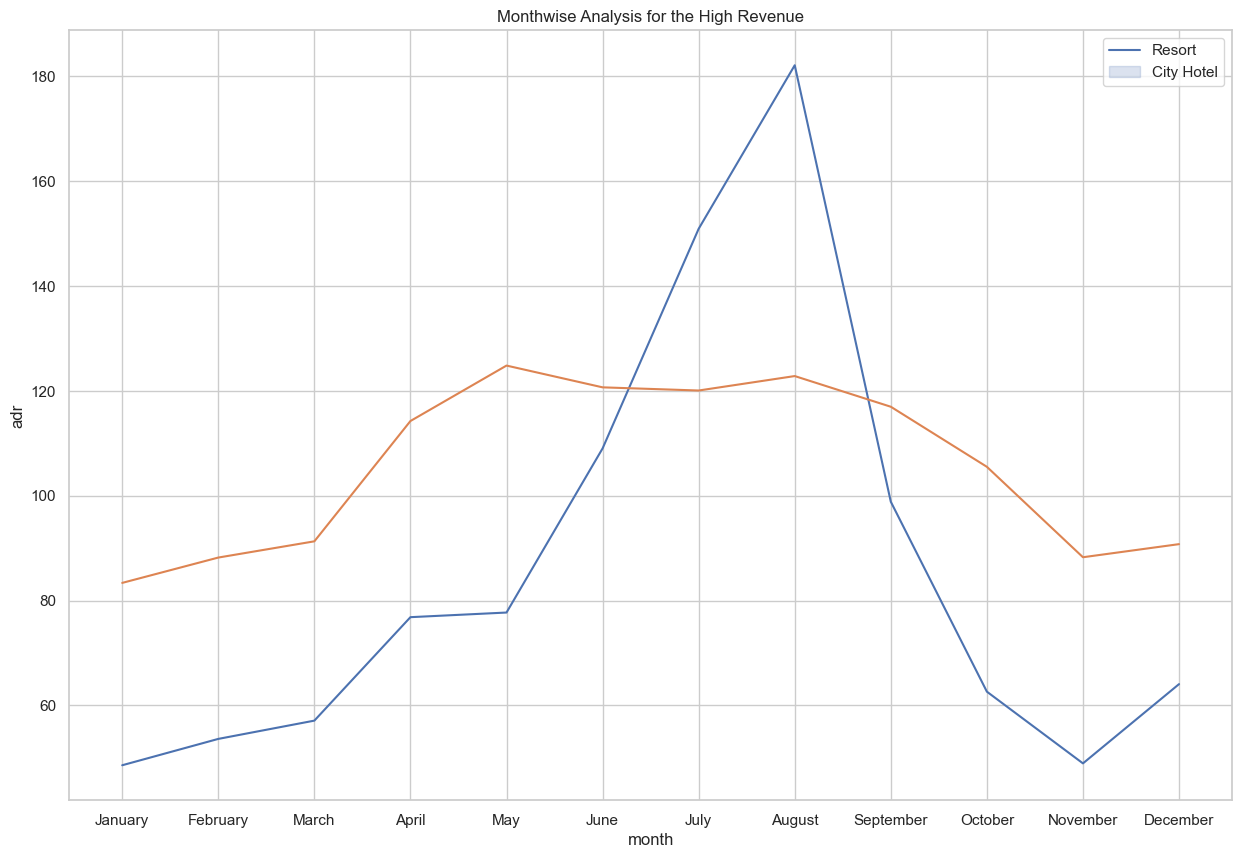

In [ ]:
resort_hotel = data_resort.groupby(['arrival_date_month'])['adr'].mean().reset_index()
city_hotel=data_city.groupby(['arrival_date_month'])['adr'].mean().reset_index()
final_hotel = resort_hotel.merge(city_hotel, on = 'arrival_date_month')
final_hotel.columns = ['month', 'price_for_resort', 'price_for_city_hotel']
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
final_hotel['month'] = pd.Categorical(final_hotel['month'], categories=months, ordered=True)
final_hotel = final_hotel.sort_values('month').reset_index()
sns.lineplot(data=final_hotel, x='month', y='price_for_resort')
sns.lineplot(data=final_hotel, x='month', y='price_for_city_hotel')
plt.legend(['Resort','City Hotel'])
plt.ylabel('adr')
fig = plt.gcf()
fig.set_size_inches(15,10)
plt.title('Monthwise Analysis for the High Revenue')

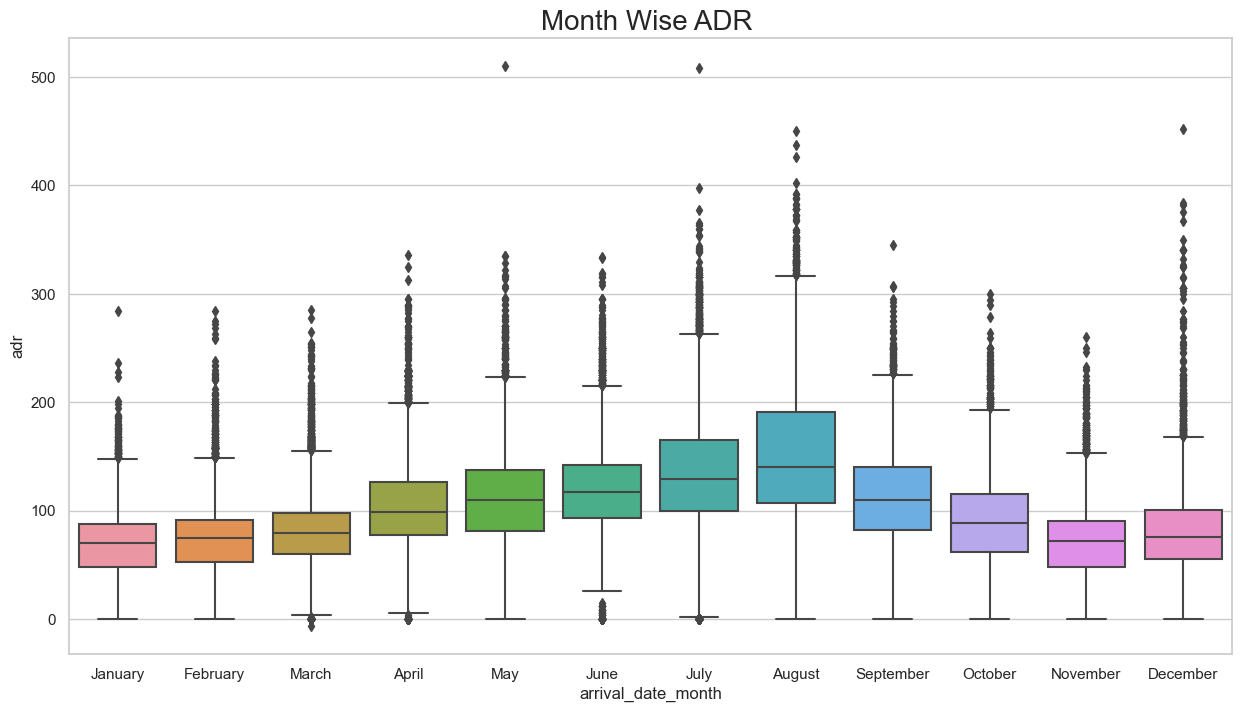

In [ ]:
reindex = ['January', 'February','March','April','May','June','July','August','September','October','November','December']
df1['arrival_date_month'] = pd.Categorical(df1['arrival_date_month'],categories=reindex,ordered=True)
plt.figure(figsize = (15,8))
sns.boxplot(x = df1['arrival_date_month'],y = df1['adr'])
plt.title('Month Wise ADR ',fontsize=20)
plt.show()

Avg adr rises from beginning of year upto middle of year and reaches peak at August and then lowers to the end of year. But hotels do make some good deals with high adr at end of year also.

Now let us check the trend of arrival_num and avg adr within a month.

Text(0.5, 1.0, 'Average ADR by Day of Month')

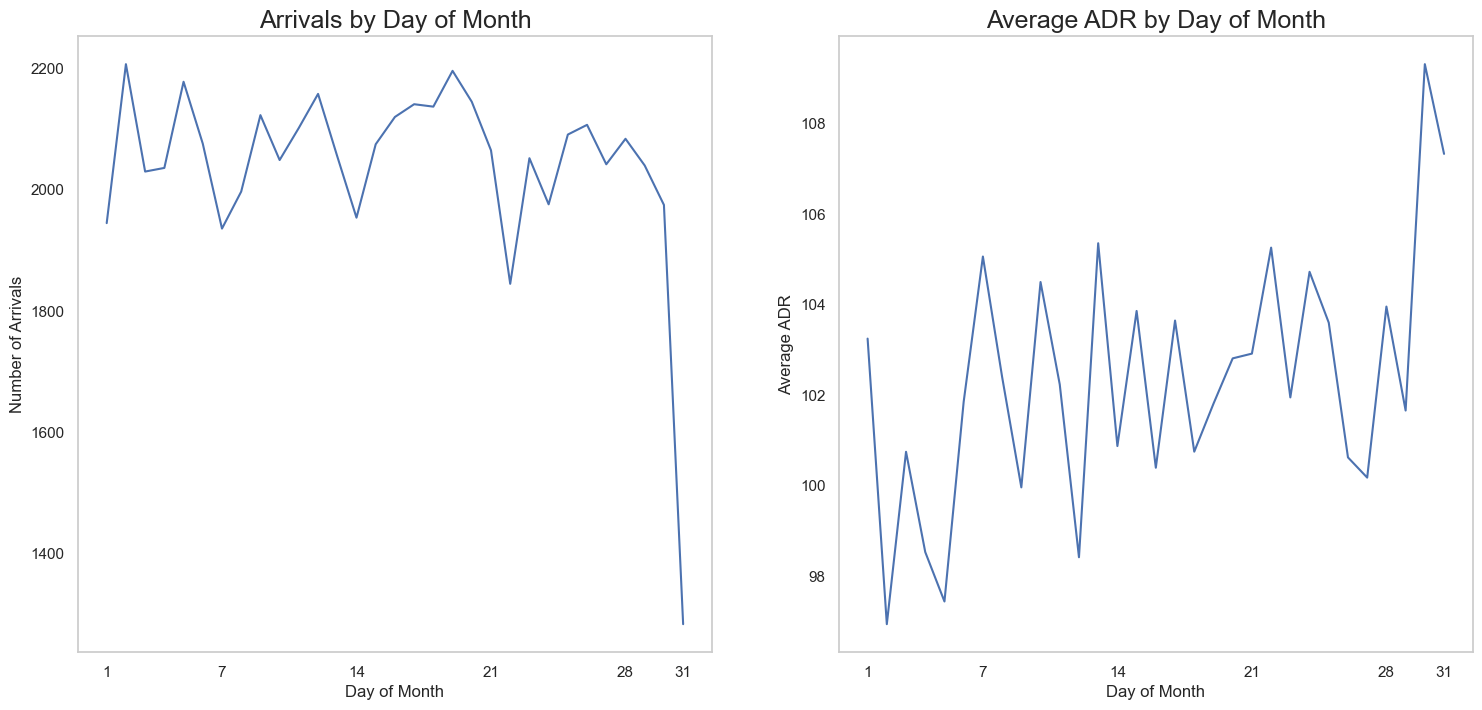

In [ ]:

# Create a DataFrame 'd6' with arrival numbers and average ADR for each day of the month
d6 = pd.DataFrame(not_canceled.groupby('arrival_date_day_of_month').size()).rename(columns={0: 'Arrival_num'})
d6['avg_adr'] = not_canceled.groupby('arrival_date_day_of_month')['adr'].agg(np.mean)

# Create a subplot with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

# Plotting arrival numbers for each day of the month
g = sns.lineplot(ax=axes[0], x=d6.index, y=d6['Arrival_num'])
g.grid()
g.set_xticks([1, 7, 14, 21, 28, 31])
g.set_xticklabels([1, 7, 14, 21, 28, 31])
axes[0].set_xlabel('Day of Month')
axes[0].set_ylabel('Number of Arrivals')
axes[0].set_title('Arrivals by Day of Month',fontsize=18)

# Plotting average ADR for each day of the month
h = sns.lineplot(ax=axes[1], x=d6.index, y=d6['avg_adr'])
h.grid()
h.set_xticks([1, 7, 14, 21, 28, 31])
h.set_xticklabels([1, 7, 14, 21, 28, 31])
axes[1].set_xlabel('Day of Month')
axes[1].set_ylabel('Average ADR')
axes[1].set_title('Average ADR by Day of Month',fontsize=18)


We can see that graph Arrival_num has small peaks at regular interval of days. This can be due to increase in arrival weekend.\
\
Also the avg adr tends to go up as month ends. Therefore charge more at the end of month.

Let us divide our customers in three categories of single, couple and family/friends. then check their booking %

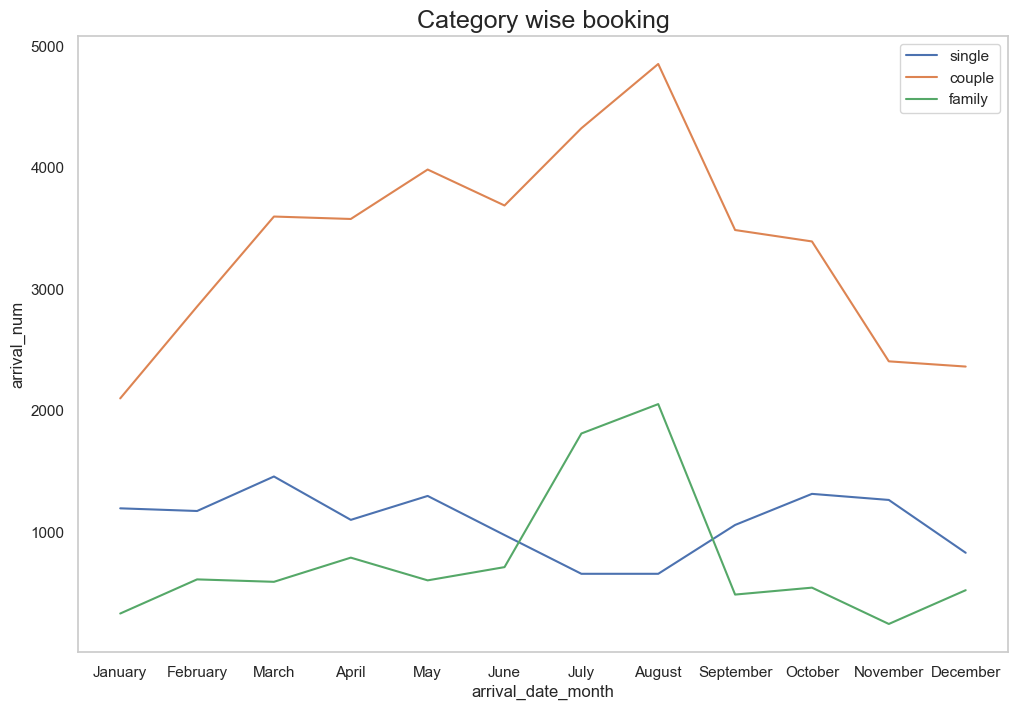

In [ ]:
## Select single, couple, multiple adults and family
single   = not_canceled[(not_canceled['adults']==1) & (not_canceled['children']==0) & (not_canceled['babies']==0)]
couple   = not_canceled[(not_canceled['adults']==2) & (not_canceled['children']==0) & (not_canceled['babies']==0)]
family   = not_canceled[not_canceled['adults'] + not_canceled['children'] + not_canceled['babies'] > 2]

reindex = ['January', 'February','March','April','May','June','July','August','September','October','November','December']

fig, ax = plt.subplots(figsize=(12, 8))

for type in ['single', 'couple', 'family']:
  d1 = eval(type).groupby(['arrival_date_month']).size().reset_index().rename(columns = {0:'arrival_num'})
  d1['arrival_date_month'] = pd.Categorical(d1['arrival_date_month'],categories=reindex,ordered=True)
  sns.lineplot(data=d1, x= 'arrival_date_month', y='arrival_num', label=type, ax=ax)
  
plt.grid()
plt.title('Category wise booking',fontsize=18)
plt.show()

Moslty bookings are done by couples(although we are not sure that they are couple as data doesn't tell about that)

It is clear from graph that their is a sudden surge in arrival num of couples and family in months of July and August. So better plans can be planned accordingly at that time for these type of customers.

###What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests?

Text(0.5, 1.0, 'Requests By Market segment')

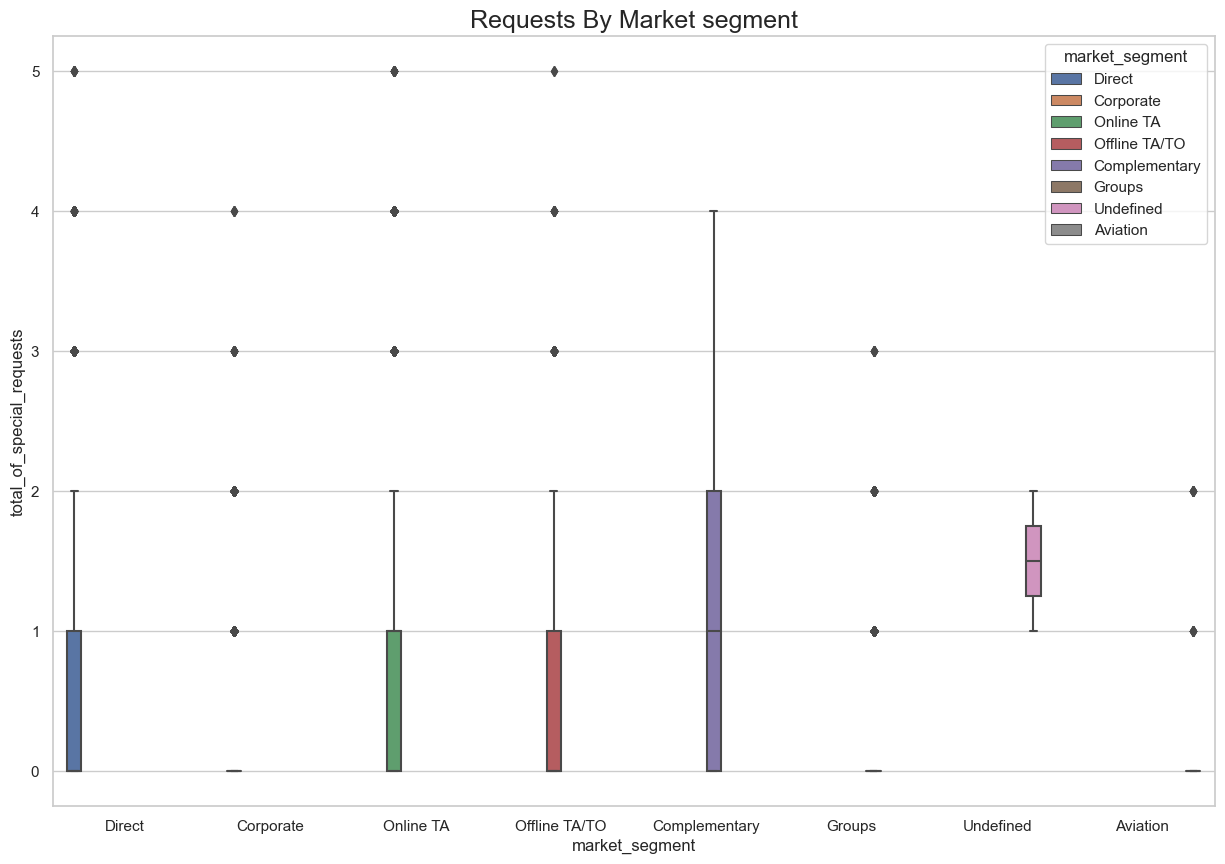

In [ ]:
#Special request acoording to market segment
sns.boxplot(x="market_segment", y="total_of_special_requests",hue='market_segment',data= df1)

fig = plt.gcf()
fig.set_size_inches(15,10)
plt.title('Requests By Market segment',fontsize=18)

All of market segment mostly have special request.

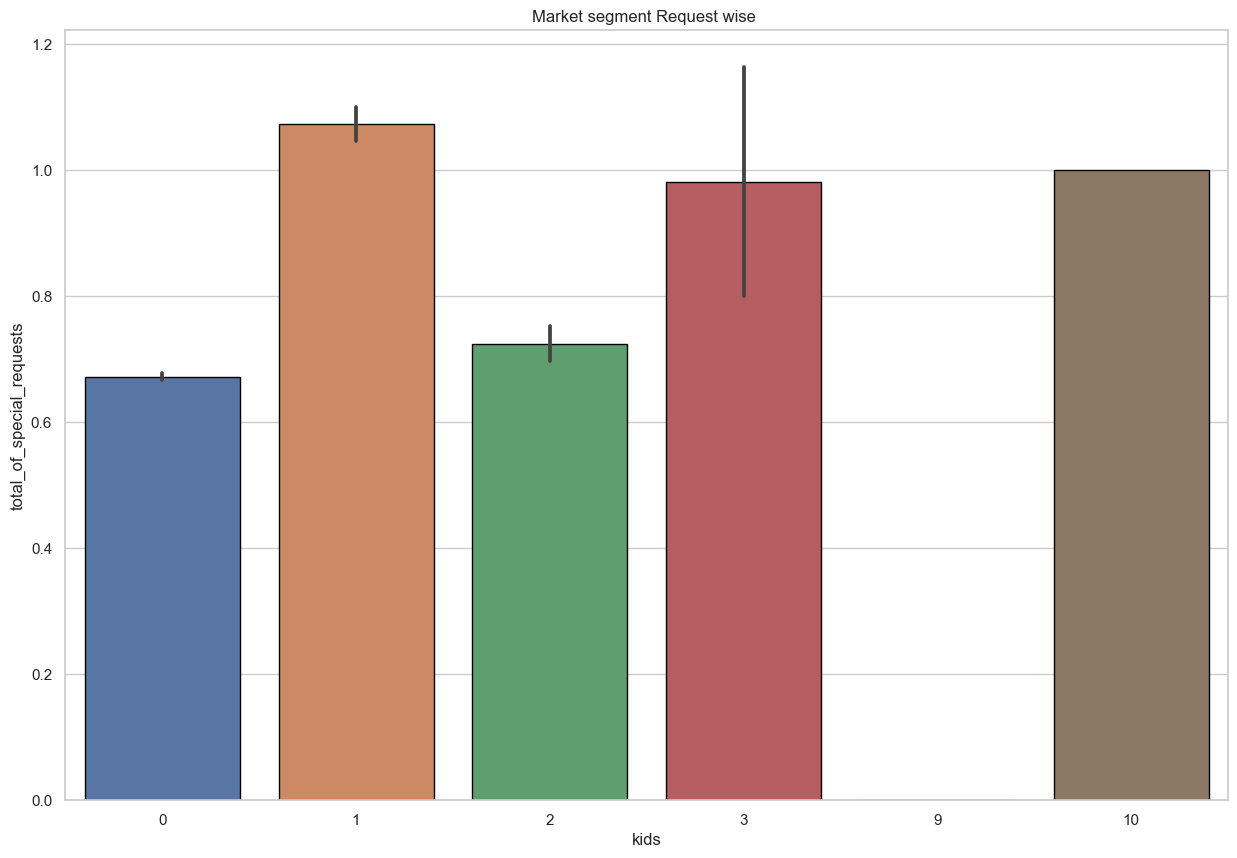

In [ ]:

df1['kids'] = df1['children'] + df1['babies']

# Create a barplot to visualize the total number of special requests based on the number of kids
sns.barplot(x="kids", y="total_of_special_requests", data=df1, edgecolor='Black')

# Set the size of the plot
fig = plt.gcf()
fig.set_size_inches(15, 10)

# Display the plot
plt.title('Market segment Request wise ')
plt.show()


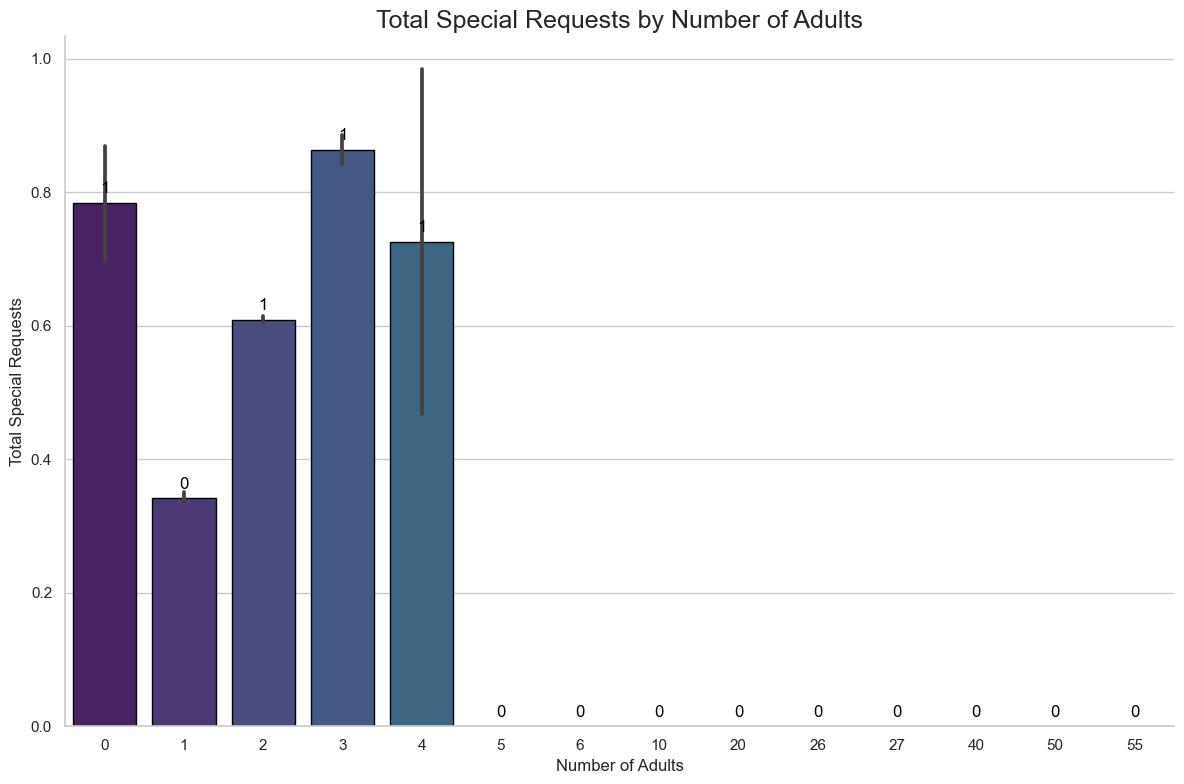

In [ ]:
# Create a barplot with enhanced styling
plt.figure(figsize=(12, 8))
sns.set_style("whitegrid")
sns.barplot(x="adults", y="total_of_special_requests", data=hotel_df, palette="viridis",edgecolor='Black')

# Add title and labels
plt.title("Total Special Requests by Number of Adults",fontsize=18)
plt.xlabel("Number of Adults")
plt.ylabel("Total Special Requests")

# Add data labels on top of each bar
ax = plt.gca()
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 10),
                textcoords='offset points')
sns.despine()
plt.tight_layout()
plt.show()

#From where the most guests are coming ?

In [ ]:
country_wise_guests = df1[df1['is_canceled'] == 0]['country'].value_counts().reset_index()
country_wise_guests.columns = ['country', 'No of guests']
country_wise_guests

country  No of guests
0       PRT         17573
1       GBR          8440
2       FRA          7091
3       ESP          5382
4       DEU          4332
..      ...           ...
161     ZMB             1
162     SYC             1
163     MDG             1
164     SMR             1
165     FRO             1

[166 rows x 2 columns]

In [ ]:
basemap = folium.Map()
guests_map = px.choropleth(country_wise_guests, locations = country_wise_guests['country'],color = country_wise_guests['No of guests'], hover_name = country_wise_guests['country'])
guests_map.show()

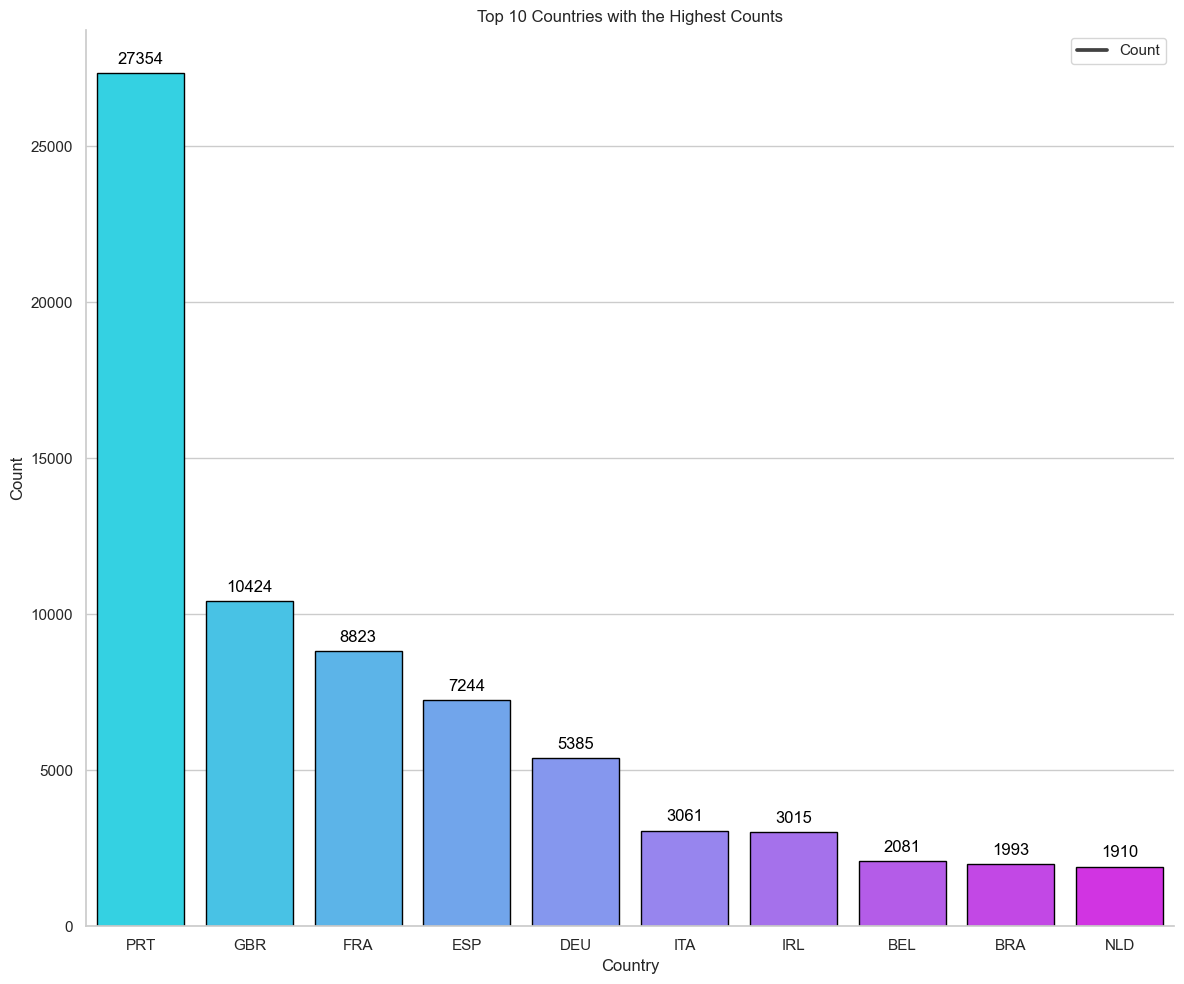

In [ ]:

# Create a barplot with enhanced styling
plt.figure(figsize=(12, 10))
sns.set_style("whitegrid")

# Create the barplot
ax = sns.barplot(x=d1['country'], y=d1['Count'], edgecolor='black', palette="cool")

# Add title and labels
plt.title("Top 10 Countries with the Highest Counts")
plt.xlabel("Country")
plt.ylabel("Count")

# Add data labels on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 10),
                textcoords='offset points')

# Remove the top and right spines
sns.despine()

# Add a legend label
ax.legend(labels=['Count'], loc='upper right')

# Show the plot
plt.tight_layout()
plt.show()


Most guest are from Portugal and other Europian contries.

# How long do people stay at the hotels?



In [ ]:
filter = df1['is_canceled'] == 0
data = df1[filter]
data.head()

hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0        342               2015               July   
1  Resort Hotel            0        737               2015               July   
2  Resort Hotel            0          7               2015               July   
3  Resort Hotel            0         13               2015               July   
4  Resort Hotel            0         14               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  ...  company  \
0                        0                     0       2  ...        0   
1                        0                     0       2  ...        0   
2                        0                     1       1  ...        0   
3                        0                     1       1  ...        0   
4                        0                     2       2  ...        0   

   days_in_waiting_list customer_type   adr required_car_parking_spaces  \
0                     0     Transient   0.0                           0   
1                     0     Transient   0.0                           0   
2                     0     Transient  75.0                           0   
3                     0     Transient  75.0                           0   
4                     0     Transient  98.0                           0   

  total_of_special_requests  reservation_status  reservation_status_date  \
0                         0           Check-Out               2015-07-01   
1                         0           Check-Out               2015-07-01   
2                         0           Check-Out               2015-07-02   
3                         0           Check-Out               2015-07-02   
4                         1           Check-Out               2015-07-03   

   total_stay total_people  
0           0            2  
1           0            2  
2           1            1  
3           1            1  
4           2            2  

[5 rows x 34 columns]

In [ ]:

data['total_nights'] = data['stays_in_weekend_nights'] + data['stays_in_week_nights']
data.head()

C:\Users\Admin\AppData\Local\Temp\ipykernel_182084\334951669.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0        342               2015               July   
1  Resort Hotel            0        737               2015               July   
2  Resort Hotel            0          7               2015               July   
3  Resort Hotel            0         13               2015               July   
4  Resort Hotel            0         14               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  ...  \
0                        0                     0       2  ...   
1                        0                     0       2  ...   
2                        0                     1       1  ...   
3                        0                     1       1  ...   
4                        0                     2       2  ...   

   days_in_waiting_list  customer_type   adr required_car_parking_spaces  \
0                     0      Transient   0.0                           0   
1                     0      Transient   0.0                           0   
2                     0      Transient  75.0                           0   
3                     0      Transient  75.0                           0   
4                     0      Transient  98.0                           0   

  total_of_special_requests reservation_status  reservation_status_date  \
0                         0          Check-Out               2015-07-01   
1                         0          Check-Out               2015-07-01   
2                         0          Check-Out               2015-07-02   
3                         0          Check-Out               2015-07-02   
4                         1          Check-Out               2015-07-03   

   total_stay  total_people total_nights  
0           0             2            0  
1           0             2            0  
2           1             1            1  
3           1             1            1  
4           2             2            2  

[5 rows x 35 columns]

In [ ]:
stay = data.groupby(['total_nights', 'hotel']).agg('count').reset_index()
stay = stay.iloc[:, :3]
stay = stay.rename(columns={'is_canceled':'Number of stays'})
stay

total_nights         hotel  Number of stays
0              0    City Hotel              218
1              0  Resort Hotel              350
2              1    City Hotel             7972
3              1  Resort Hotel             6036
4              2    City Hotel             7630
..           ...           ...              ...
57            46  Resort Hotel                1
58            48    City Hotel                1
59            56  Resort Hotel                1
60            60  Resort Hotel                1
61            69  Resort Hotel                1

[62 rows x 3 columns]

Text(0, 0.5, 'Number of Stays')

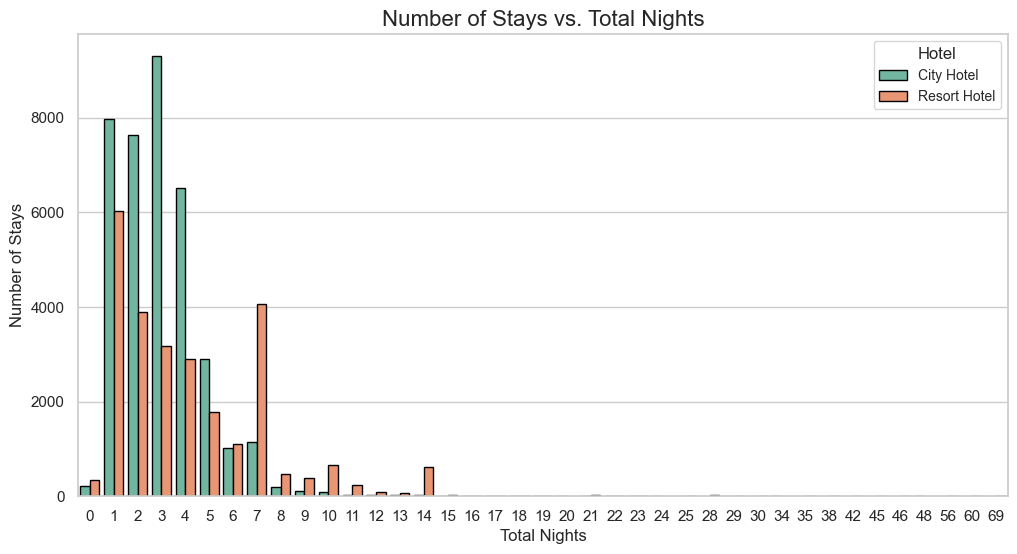

In [ ]:
plt.figure(figsize = (12,6))
sns.barplot(x = 'total_nights', y = 'Number of stays',data= stay,hue='hotel',edgecolor='black', palette="Set2")
plt.legend(title='Hotel', title_fontsize=12, fontsize=10, loc='upper right')
plt.title('Number of Stays vs. Total Nights', fontsize=16)
plt.xlabel('Total Nights', fontsize=12)
plt.ylabel('Number of Stays', fontsize=12)


"Most people prefer to stay at the hotels for a shorter duration, typically up to 5 days. This preference for shorter stays is often influenced by various factors, including the purpose of the trip, budget considerations, and personal preferences. Shorter stays may be more common for business travelers who have limited time for their trips and prefer the convenience of a hotel stay.